In [3]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from nltk.corpus import *
import nltk
from nltk.tokenize import *
from vaderSentiment.vaderSentiment import *

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
c = ['target', 'id', 'date', 'query', 'user', 'text']
d = pd.read_csv(r'D:/Code Tech IT Internship/training.1600000.processed.noemoticon.csv', encoding = 'latin1', names = c)
print(d.head())

   target          id                          date     query  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [6]:
def pre(t):
    t = re.sub(r'http\S+', '', t)
    t = re.sub(r'@\w+', '', t)
    t = re.sub(r'#\w+', '', t)
    t = re.sub(r'\d+', '', t)
    t = t.lower()
    t = word_tokenize(t)
    t = [w for w in t if w.isalnum()]
    t = [w for w in t if w not in stopwords.words('english')]
    return ' '.join(t)

d = d.head(1000)

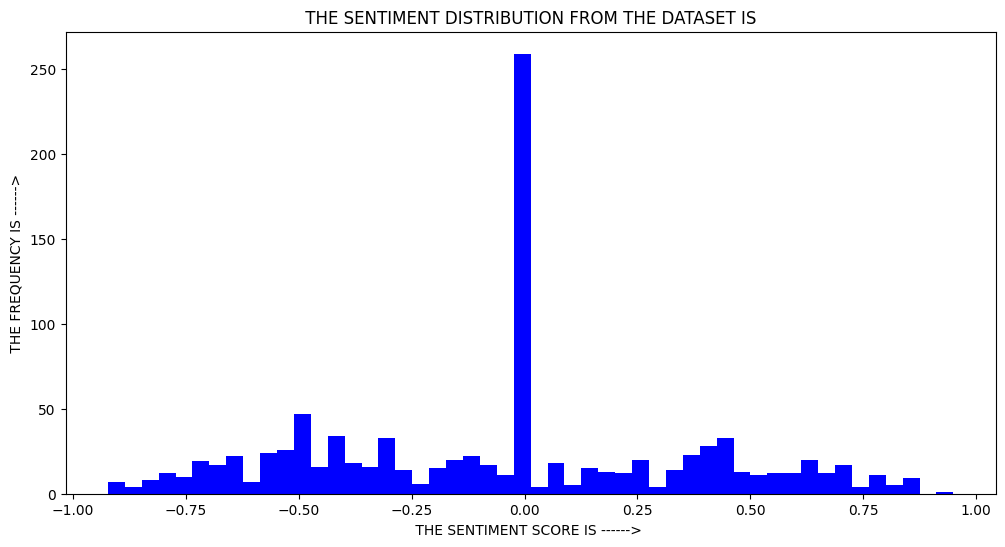

In [7]:
if 'text' in d.columns:
    d['cleaned_text'] = d['text'].apply(pre)

    a = SentimentIntensityAnalyzer()
    d['sentiment'] = d['cleaned_text'].apply(lambda x: a.polarity_scores(x)['compound'])

    plt.figure(figsize = (12, 6))
    plt.hist(d['sentiment'], bins = 50, color = 'blue')
    plt.title(' THE SENTIMENT DISTRIBUTION FROM THE DATASET IS ')
    plt.xlabel(' THE SENTIMENT SCORE IS ------>  ')
    plt.ylabel(' THE FREQUENCY IS ------> ')
    plt.show()

    if 'timestamp' in d.columns:
        d['timestamp'] = pd.to_datetime(d['timestamp'])
        d.set_index('timestamp', inplace = True)
        d['sentiment'].resample('M').mean().plot(kind = 'line', figsize = (12, 6), color = 'blue')
        plt.title(' THE SENTIMENT TREND OVER TIME IS ')
        plt.xlabel(' THE TIME UNITS -----> ')
        plt.ylabel(' THE AVERAGE SENTIMENT SCORE IS ------> ')
        plt.show()
else:
    print(' THE "TEXT" COLUMN DOES NOT EXIST IN THE DATAFRAME ')